Написать функцию, реализующую алгоритм k-means. Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. Функция должна содержать только один цикл while (for).

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'

In [28]:
def get_label(pts, centroids):
  pts = pts[:,np.newaxis,:] 
  bigmass = pts - centroids 
  dist = np.linalg.norm(bigmass, axis = 2)
  return np.argmin(dist,axis = 1)


def get_min(pts,centroids):
  pts = pts[:,np.newaxis,:]
  bigmass = pts - centroids
  dist = np.linalg.norm(bigmass, axis = 2)
  return np.min(dist,axis = 1)

def get_distortion(pts,centroids):
  return np.linalg.norm(get_min(pts,centroids))

In [29]:
def my_kmeans(data, k, accuracy = 1e-05):
  centroids = np.random.uniform(min(np.min(data, axis = 0)), max(np.max(data, axis = 0)), k*data.shape[1]).reshape(k, data.shape[1])
  newCentroids = data[:k,:]
  distortion = get_distortion(data,centroids)
  labels = get_label(data, centroids)
  while(np.linalg.norm(centroids-newCentroids)> accuracy):
    distortion = get_distortion(data, centroids)
    centroids = newCentroids
    labels = get_label(data, centroids)
    newCentroids = np.array([np.mean(data[np.where(labels == i)], axis = 0) for i in range(k)])
  return newCentroids, get_distortion(data, newCentroids)

С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возрвст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.

Первый разрез

In [40]:
dt = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
cols = [2,3]
dat = dt[:, cols]
data = dat.astype(np.float64)
print(data)

[[ 19.  15.]
 [ 21.  15.]
 [ 20.  16.]
 [ 23.  16.]
 [ 31.  17.]
 [ 22.  17.]
 [ 35.  18.]
 [ 23.  18.]
 [ 64.  19.]
 [ 30.  19.]
 [ 67.  19.]
 [ 35.  19.]
 [ 58.  20.]
 [ 24.  20.]
 [ 37.  20.]
 [ 22.  20.]
 [ 35.  21.]
 [ 20.  21.]
 [ 52.  23.]
 [ 35.  23.]
 [ 35.  24.]
 [ 25.  24.]
 [ 46.  25.]
 [ 31.  25.]
 [ 54.  28.]
 [ 29.  28.]
 [ 45.  28.]
 [ 35.  28.]
 [ 40.  29.]
 [ 23.  29.]
 [ 60.  30.]
 [ 21.  30.]
 [ 53.  33.]
 [ 18.  33.]
 [ 49.  33.]
 [ 21.  33.]
 [ 42.  34.]
 [ 30.  34.]
 [ 36.  37.]
 [ 20.  37.]
 [ 65.  38.]
 [ 24.  38.]
 [ 48.  39.]
 [ 31.  39.]
 [ 49.  39.]
 [ 24.  39.]
 [ 50.  40.]
 [ 27.  40.]
 [ 29.  40.]
 [ 31.  40.]
 [ 49.  42.]
 [ 33.  42.]
 [ 31.  43.]
 [ 59.  43.]
 [ 50.  43.]
 [ 47.  43.]
 [ 51.  44.]
 [ 69.  44.]
 [ 27.  46.]
 [ 53.  46.]
 [ 70.  46.]
 [ 19.  46.]
 [ 67.  47.]
 [ 54.  47.]
 [ 63.  48.]
 [ 18.  48.]
 [ 43.  48.]
 [ 68.  48.]
 [ 19.  48.]
 [ 32.  48.]
 [ 70.  49.]
 [ 47.  49.]
 [ 60.  50.]
 [ 60.  50.]
 [ 59.  54.]
 [ 26.  54.]
 [ 45.  54.]

<function matplotlib.pyplot.show(*args, **kw)>

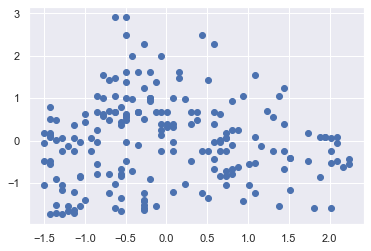

In [41]:
data -= np.mean(data, axis = 0) 
data /= np.std(data, axis = 0)
plt.scatter(*data.T)
plt.show

In [42]:
k = int(input("Input number of clasters "))
centroids, distortion = my_kmeans(data, k)
labels = get_label(data, centroids)

Input number of clasters 3


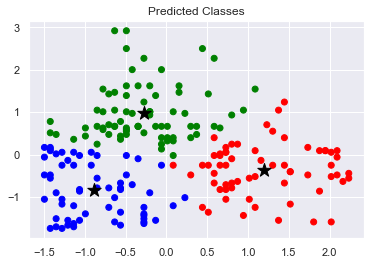

In [43]:
colors = np.array(['blue', 'red', 'green', 'black', 'yellow', 'pink']*k)
labels = get_label(data, centroids)
plt.scatter(*data.T, c = colors[labels[:]])
plt.scatter(*np.array(centroids).T, c = 'black', marker='*', s = 200)
plt.title('Predicted Classes')
plt.show()

Второй разрез

In [44]:
dt = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
cols = [2,4]
dat = dt[:, cols]
data = dat.astype(np.float64)
print(data)

[[19. 39.]
 [21. 81.]
 [20.  6.]
 [23. 77.]
 [31. 40.]
 [22. 76.]
 [35.  6.]
 [23. 94.]
 [64.  3.]
 [30. 72.]
 [67. 14.]
 [35. 99.]
 [58. 15.]
 [24. 77.]
 [37. 13.]
 [22. 79.]
 [35. 35.]
 [20. 66.]
 [52. 29.]
 [35. 98.]
 [35. 35.]
 [25. 73.]
 [46.  5.]
 [31. 73.]
 [54. 14.]
 [29. 82.]
 [45. 32.]
 [35. 61.]
 [40. 31.]
 [23. 87.]
 [60.  4.]
 [21. 73.]
 [53.  4.]
 [18. 92.]
 [49. 14.]
 [21. 81.]
 [42. 17.]
 [30. 73.]
 [36. 26.]
 [20. 75.]
 [65. 35.]
 [24. 92.]
 [48. 36.]
 [31. 61.]
 [49. 28.]
 [24. 65.]
 [50. 55.]
 [27. 47.]
 [29. 42.]
 [31. 42.]
 [49. 52.]
 [33. 60.]
 [31. 54.]
 [59. 60.]
 [50. 45.]
 [47. 41.]
 [51. 50.]
 [69. 46.]
 [27. 51.]
 [53. 46.]
 [70. 56.]
 [19. 55.]
 [67. 52.]
 [54. 59.]
 [63. 51.]
 [18. 59.]
 [43. 50.]
 [68. 48.]
 [19. 59.]
 [32. 47.]
 [70. 55.]
 [47. 42.]
 [60. 49.]
 [60. 56.]
 [59. 47.]
 [26. 54.]
 [45. 53.]
 [40. 48.]
 [23. 52.]
 [49. 42.]
 [57. 51.]
 [38. 55.]
 [67. 41.]
 [46. 44.]
 [21. 57.]
 [48. 46.]
 [55. 58.]
 [22. 55.]
 [34. 60.]
 [50. 46.]
 [68. 55.]

<function matplotlib.pyplot.show(*args, **kw)>

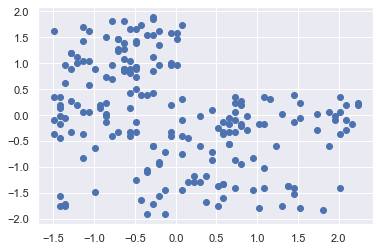

In [45]:
data -= np.mean(data, axis = 0) 
data /= np.std(data, axis = 0)
plt.scatter(*data.T)
plt.show

In [46]:
k = int(input("Input number of clasters "))
centroids, distortion = my_kmeans(data, k)
labels = get_label(data, centroids)

Input number of clasters 3


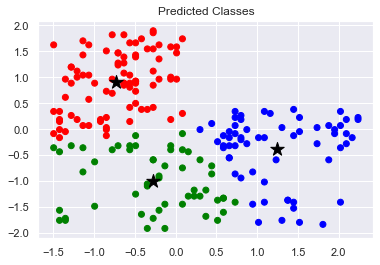

In [47]:
colors = np.array(['blue', 'red', 'green', 'black', 'yellow', 'pink']*k)
labels = get_label(data, centroids)
plt.scatter(*data.T, c = colors[labels[:]])
plt.scatter(*np.array(centroids).T, c = 'black', marker='*', s = 200)
plt.title('Predicted Classes')
plt.show()